       Entertainer Profession Gender (traditional)  Birth Year  \
0            Adele     Singer                    F        1988   
1   Angelina Jolie      Actor                    F        1975   
2  Aretha Franklin     Singer                    F        1942   
3      Bette Davis      Actor                    F        1908   
4      Betty White      Actor                    F        1922   

   Year of Breakthrough/#1 Hit/Award Nomination  \
0                                          2008   
1                                          1999   
2                                          1967   
3                                          1934   
4                                          1952   

                          Breakthrough Name  Year of First Oscar/Grammy/Emmy  \
0                                        19                           2009.0   
1                         Girl, Interrupted                           1999.0   
2  I Never Loved a Man (The Way I Love You)             

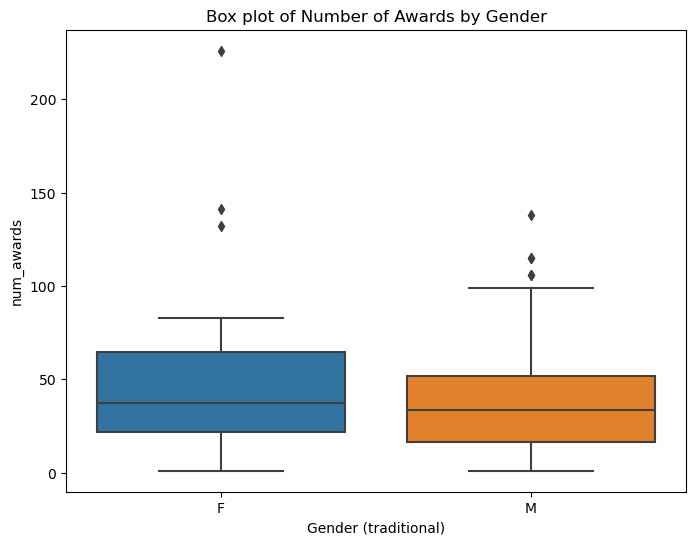


Regression analysis results:
                            OLS Regression Results                            
Dep. Variable:             num_awards   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.080
Date:                Sun, 05 Jan 2025   Prob (F-statistic):              0.154
Time:                        18:01:55   Log-Likelihood:                -358.06
No. Observations:                  70   AIC:                             720.1
Df Residuals:                      68   BIC:                             724.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const         

In [16]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("C:\\Users\\91797\\Downloads\\main_data.xlsx") 

print(df.head())

# Step 1: Descriptive statistics - mean awards by gender
mean_awards_gender = df.groupby('Gender (traditional)')['num_awards'].mean()
print("\nMean number of awards by gender:")
print(mean_awards_gender)

# Step 2: T-test - Compare the means of 'num_awards' between males and females
male_awards = df[df['Gender (traditional)'] == 'M']['num_awards']
female_awards = df[df['Gender (traditional)'] == 'F']['num_awards']

t_stat, p_value = stats.ttest_ind(male_awards, female_awards, equal_var=False)  # Welch’s T-test
print(f"\nT-Test result: t-statistic = {t_stat}, p-value = {p_value}")

# Step 3: Correlation - Encode gender as numeric and calculate correlation
df['Gender_encoded'] = df['Gender (traditional)'].map({'M': 1, 'F': 0})  # Encode Male = 1, Female = 0
correlation = df['Gender_encoded'].corr(df['num_awards'])
print(f"\nCorrelation between gender and number of awards: {correlation}")

# Step 4: Visual Analysis - Box plot to compare the distribution of awards by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender (traditional)', y='num_awards', data=df)
plt.title('Box plot of Number of Awards by Gender')
plt.show()

# Step 5: Regression Analysis - Linear regression model between gender and num_awards
import statsmodels.api as sm

# Independent variable (gender encoded) and dependent variable (num_awards)
X = sm.add_constant(df['Gender_encoded']) =
y = df['num_awards']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print("\nRegression analysis results:")
print(model.summary())


In [ ]:
#The regression analysis shows no significant relationship between gender and the number of awards (p-value = 0.154). The model explains only 3% of the variance in awards (R² = 0.030), suggesting other factors like profession or lifetime likely play a bigger role.